# House Prices Regression

# Introduction

## Question Definition

- Factors That affect the prices of a house & Prediction of house sales

## Context
- The employers at HAAS Consultancy Company would like to have better insights on what affects the prices of a house and would like to have a 'predictor' that would predict the price of a house given its features

## Metric of Success
- Relationships between the characteristics of a house and its price such as numbert of bedrooms and location in longitude/latitude
- A regression model that is the best at predicting a house's price based on its features

## Experimental Design
- Exploratory Data Analysis
- Development of regression models such as Linear Regressor, Quantile Regressor, Lasso Regressor, Ridge Regressor and Elastic Net regressor

# Data Exploration

In [80]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Regression Libraries libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

# Other ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


#seaborn theme
sns.set_theme(style="darkgrid")

In [81]:
# Load the dataset and preview first 5 records
df = pd.read_csv('/Users/RyanMburu/Documents/DS-Projects/Supervised-Learning/HAAS- Real Estate/Independent Project Week 7 - house_data.csv')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
# Last 5 records
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [83]:
# Number of records and features
df.shape

(21613, 20)

- We will work with about 21,000 records/rows of data and about 18 features as id is useless and one is the dependent variable

# Data Cleaning

## Data Types

In [84]:
# Check datatypes
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Looks good so far

## Null Values

In [85]:
# Null values
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values

## Duplicate Values

In [86]:
# Duplicates
df.duplicated().sum()

3

In [87]:
df = df.drop_duplicates()

df.duplicated().sum()

0

There were 3 duplicates and have been dropped

## Hot Encoding

- To avoid fitting our model with absurd data that will affect prediction, we will do some encoding

In [88]:
# The Year Reinovated column will be changed to 1 and 0 that represents whether the house has been reinovated or not

# The new encoded column will be saved as a new column

df['renovated'] = df['yr_renovated'].mask(df['yr_renovated'] > 1, 1)


In [89]:
# Will drop the yr reinovated column
df = df.drop(['yr_renovated'], axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,0


# Outliers

### 1. Price of houses

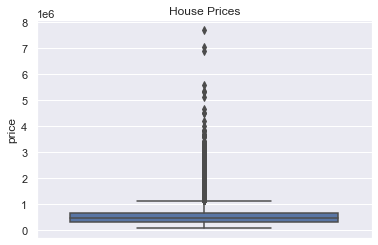

In [90]:
# Will use boxplots to show the outliers in the data

# Outliers for prices of a house

sns.boxplot(data=df, y = 'price')
plt.title('House Prices')
plt.show()

In [94]:
# Handling the outliers

# Will use the IQR method

q25 = df['price'].quantile(0.25)
q75 = df['price'].quantile(0.75)

In [96]:
# IQR and limits
IQR = q75 - q25
IQR

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR


1130081.25

In [98]:
# Identify and handle Outliers

df[df['price'] > upper_limit]

df = df[df['price'] < upper_limit]

df


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,98103,47.6993,-122.346,1530,1509,0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,7200,0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,0


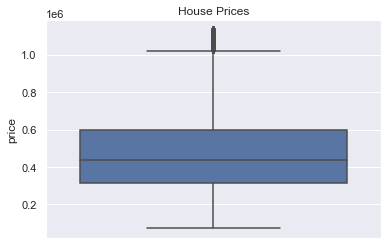

In [99]:
# Output new price boxplot to confirm
sns.boxplot(data=df, y = 'price')
plt.title('House Prices')
plt.show()

### 2. SQFT lot

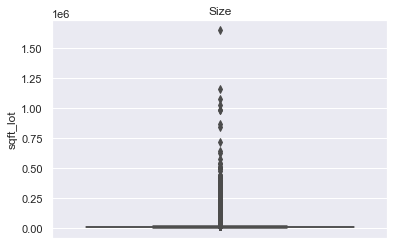

In [111]:
sns.boxplot(data=df, y = 'sqft_lot')
plt.title('Size')
plt.show()

Those are some nasty outliers that might affect our model

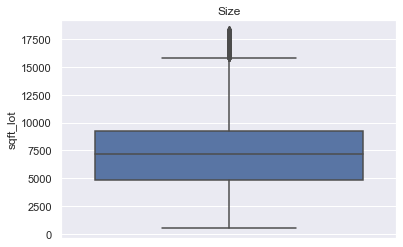

In [112]:
# Will use the IQR method

q25 = df['sqft_lot'].quantile(0.25)
q75 = df['sqft_lot'].quantile(0.75)

IQR = q75 - q25

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

df = df[df['sqft_lot'] < upper_limit]

sns.boxplot(data=df, y = 'sqft_lot')
plt.title('Size')
plt.show()

### SQFT Living

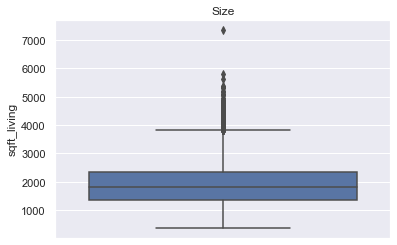

In [114]:
#Checking for outliers
sns.boxplot(data=df, y = 'sqft_living')
plt.title('Size')
plt.show()

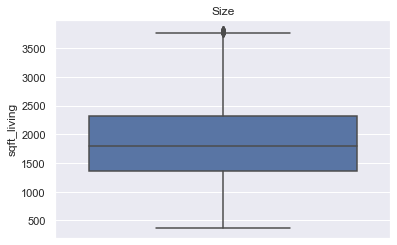

In [115]:
# handle the outliers
q25 = df['sqft_living'].quantile(0.25)
q75 = df['sqft_living'].quantile(0.75)

IQR = q75 - q25

lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR

df = df[df['sqft_living'] < upper_limit]

sns.boxplot(data=df, y = 'sqft_living')
plt.title('Size')
plt.show()

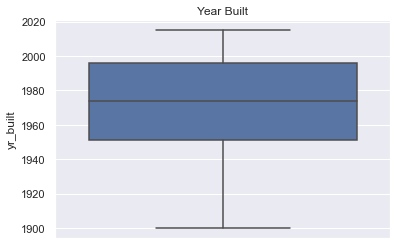

In [101]:
# Lets see if the years have any outlier
sns.boxplot(data=df, y = 'yr_built')
plt.title('Year Built')
plt.show()

As there are no more outliers, we are done with cleaning and will explore our dataset

In [118]:
# Lets see how many records we are left with
df.shape

(17979, 20)

# EDA

## Univariate Analysis

In [116]:
# Average price of houses

df['price'].mean()

461862.5639357028

In [119]:
# Summary of Prices
df['price'].describe()

count    1.797900e+04
mean     4.618626e+05
std      2.003425e+05
min      7.800000e+04
25%      3.070000e+05
50%      4.250000e+05
75%      5.800000e+05
max      1.130000e+06
Name: price, dtype: float64

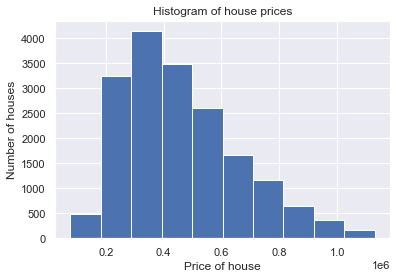

In [120]:
# Distribution
df['price'].hist()
plt.title('Histogram of house prices')
plt.xlabel('Price of house')
plt.ylabel('Number of houses')
plt.show()

The distribution is slightly skewed to the left

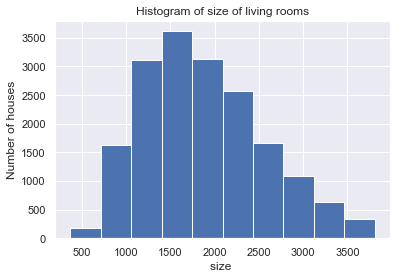

In [121]:
# Other histograms
df['sqft_living'].hist()
plt.title('Histogram of size of living rooms')
plt.xlabel('size ')
plt.ylabel('Number of houses')
plt.show()

Normally distributed

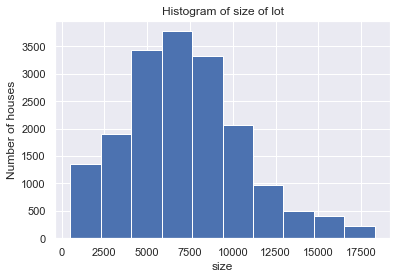

In [122]:
# Histogram for size of parking lot
df['sqft_lot'].hist()
plt.title('Histogram of size of lot')
plt.xlabel('size')
plt.ylabel('Number of houses')
plt.show()

Normally distributed as well